In [12]:
import pandas as pd 
import seaborn as sns 

In [13]:
df = sns.load_dataset('iris')

In [14]:
df.to_csv('data/iris.csv', index=False)

In [15]:
import dask.dataframe as dd

In [16]:
df_dask = dd.read_csv('data/iris.csv')

In [17]:

df_dask.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
df_dask.compute()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
%%timeit
df_dask.loc[:,'sepal_length':'petal_length'].head()

11.6 ms ± 630 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
%%timeit
df.loc[:,'sepal_length':'petal_length'].head()

188 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [48]:
%%timeit
df_dask_grouped = df_dask.groupby('species').agg({
    'sepal_length':sum,
    'sepal_width':sum, 
    'petal_length': sum,
    'petal_width':sum
})
df_dask_grouped

6.99 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%%timeit
df_grouped = df.groupby('species').agg({
    'sepal_length':sum,
    'sepal_width':sum, 
    'petal_length': sum,
    'petal_width':sum
})
df_grouped.head(5)

2.56 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [61]:
colors = ['red', 'orange', 'yellow', 'green']
for each in colors:
    print(each)

red
orange
yellow
green


In [71]:
shapes = [3,4,5,6,3,3]
result = itertools.combinations(set(shapes), 2)
for each in result:
    print(each)

(3, 4)
(3, 5)
(3, 6)
(4, 5)
(4, 6)
(5, 6)


In [78]:
for i in itertools.count(start = 10,step = 3):
    print(i)
    if i > 20:
        break

10
13
16
19
22


In [1]:
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
df = sns.load_dataset('mpg')
print('df shape: ', df.shape)
df.head(3)

df shape:  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


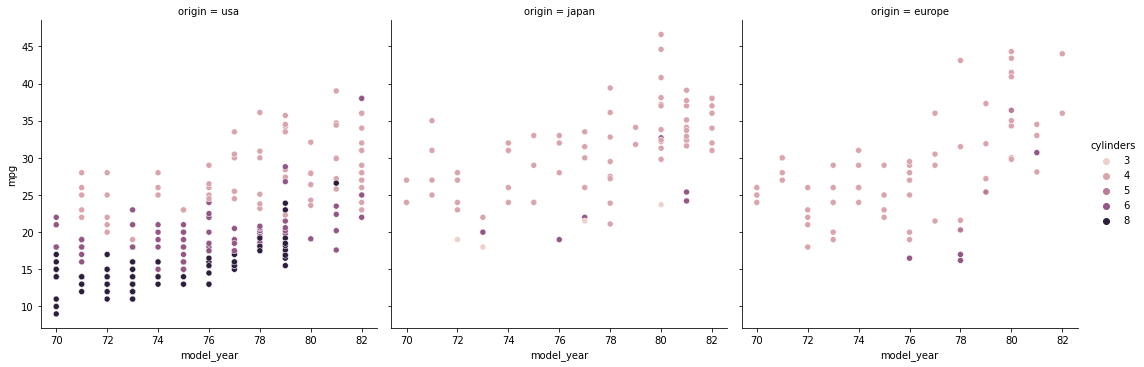

In [20]:
sns.relplot(x='model_year', y='mpg', col='origin', hue='cylinders', data=df)

In [1]:
import pandas as pd;
import numpy as np 
import matplotlib.pyplot as plt 

import torch
import torch.nn as nn 

import tensorflow as tf 
from tensorflow import keras 

2021-09-22 10:07:08.239886: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-22 10:07:08.239907: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject
